ACTIVIDAD 5 USO DE SOFTWARE PARA BUSQUEDA ALUMNO: ROGELIO GUADALUPE TELLEZ MARTINEZ MATRICULA: 2007528 HORA: N1 GRUPO: 007

In [2]:
#Librerias
import tensorflow as tf #Libreria de tensor flow y keras
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [3]:
#Importar datos
mnist_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = mnist_data

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Etiquetas
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [4]:
#Explorar datos
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

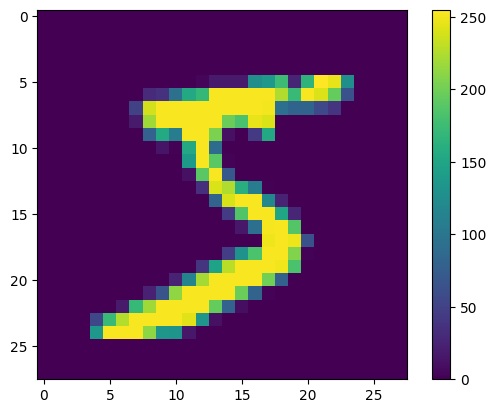

In [5]:
#Preprocesamiento
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [11]:
#Generar modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
#Compilar modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Cargar modelo
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 7s 3ms/step - loss: 2.4700 - accuracy: 0.8642
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3716 - accuracy: 0.9112
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2784 - accuracy: 0.9293
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2496 - accuracy: 0.9372
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2267 - accuracy: 0.9436
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2078 - accuracy: 0.9486
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1974 - accuracy: 0.9510
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1902 - accuracy: 0.9542
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1824 - accuracy: 0.9550
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1739 - accurac

In [12]:
#Precisión
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2315 - accuracy: 0.9546 - 596ms/epoch - 2ms/step

Test accuracy: 0.9545999765396118


In [26]:
#Predicciones
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]



313/313 [==============================] - 1s 2ms/step


array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.23196931, 0.08533674, 0.08533674],
      dtype=float32)

In [27]:
np.argmax(predictions[0])


7

In [28]:
test_labels[0]

7

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

NameError: name 'class_names' is not defined

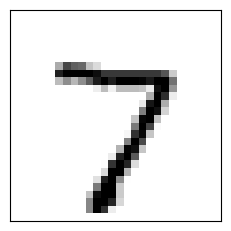

In [39]:

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

NameError: name 'class_names' is not defined

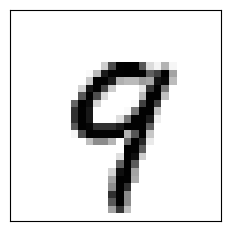

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

NameError: name 'class_names' is not defined

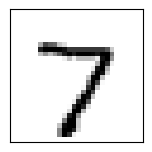

In [37]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [32]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [33]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 55ms/step
[[0.0000000e+00 1.6734718e-07 9.9999988e-01 3.3684542e-16 2.2626560e-38
  1.2380408e-25 2.8442428e-20 3.5672637e-19 1.5262055e-19 0.0000000e+00]]


NameError: name 'class_names' is not defined

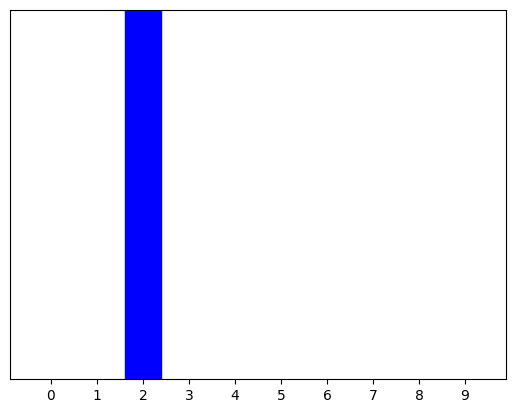

In [35]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [36]:
np.argmax(predictions_single[0])

2